<a href="https://colab.research.google.com/github/shubhamcoder260/ml_projects/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn --quiet


In [ ]:
import pandas as pd
import numpy as np
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [ ]:
insurance_df.age.describe()
fig=px.histogram(insurance_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Distribution of age')
fig.update_layout(bargap=0.5)




fig1=px.histogram(insurance_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['maroon'],
                 nbins=47,
                 title='Distribution of bmi')
fig1.update_layout(bargap=0.5)


fig2=px.histogram(insurance_df,
                  x='region',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['pink','blue'],
                  title='Annual Medical Charges')
fig2.update_layout(bargap=0.5)

fig3=px.violin(insurance_df,x='region',y='charges')


fig3.show()
fig.show()
fig1.show()
fig2.show()


In [ ]:
fig3=px.scatter(insurance_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges')
fig3.update_traces(marker_size=5)
fig3.show()

fig4=px.scatter(insurance_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')
fig4.update_traces(marker_size=8)
fig4.show()

In [ ]:
fig3=px.violin(insurance_df,
                x='age',
                y='charges')

fig3.update_traces(marker_size=5)
fig3.show()

px.violin(insurance_df,x='children',y='charges')


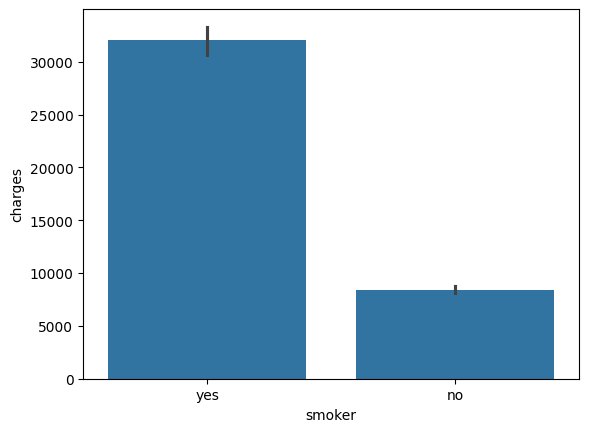

In [ ]:
fig3=sns.barplot(insurance_df,
                x='smoker',
                y='charges')
plt.show()

In [ ]:
insurance_df.charges.corr(insurance_df.age)


0.2990081933306476

In [ ]:
# insurance_df.smoker.corr(insurance_df.age)

smoker_values={'no':0,'yes':1}
smoker_numeric=insurance_df.smoker.map(smoker_values)
smoker_numeric
insurance_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
# insurance_df.corr()
# Assuming your DataFrame is named insurance_df
numeric_df = insurance_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
px.scatter(insurance_df,x='charges',y='age')

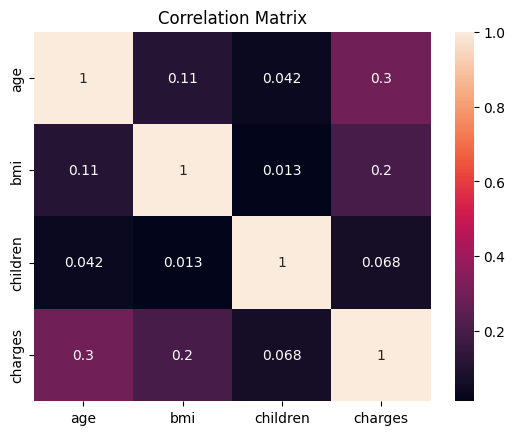

In [ ]:
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix');

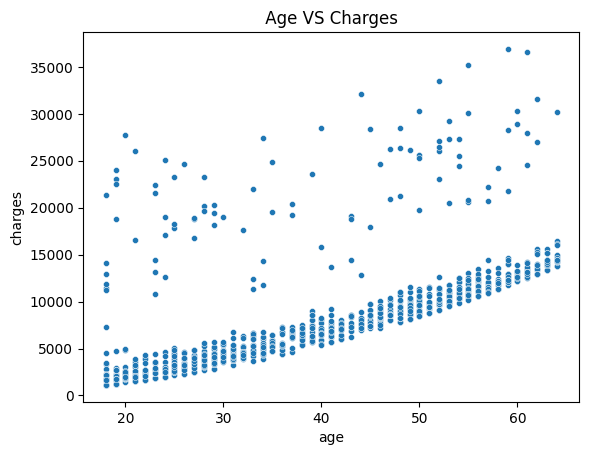

In [ ]:
non_smoker_df=insurance_df[insurance_df.smoker=='no']

plt.title(' Age VS Charges ')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=1,s=19);

3100


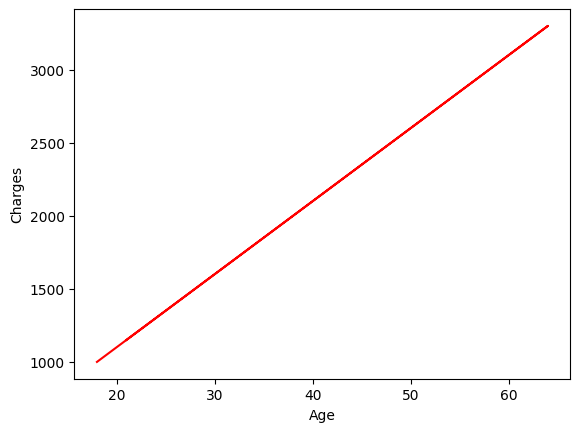

In [ ]:
def estimate_charges(age,m,c):
  return m*age+c
m=50
c=100
print(estimate_charges(60,m,c))
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,m,c)
# estimated_charges
# non_smoker_df.charges
plt.plot(ages,estimated_charges,'r-');
plt.xlabel('Age');
plt.ylabel('Charges');

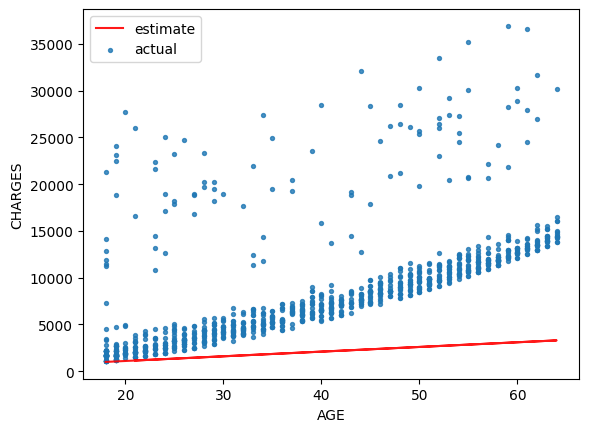

In [ ]:

target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8);
plt.xlabel('AGE');
plt.ylabel('CHARGES');
plt.legend(['estimate','actual']);

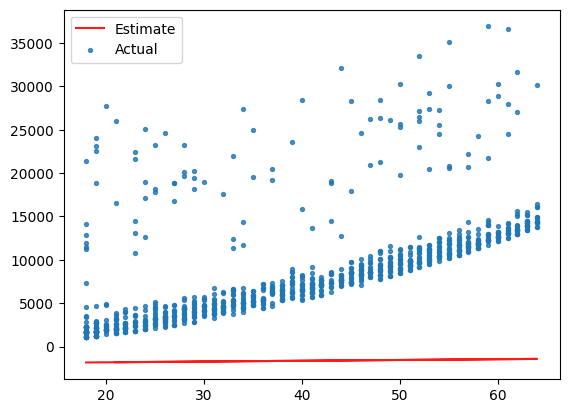

In [ ]:
def try_parameters(m,c):
    ages=non_smoker_df.age
    target=non_smoker_df.charges

    estimated_charges=estimate_charges(ages,m,c)
    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(['Estimate','Actual']);


try_parameters(9,-2000)

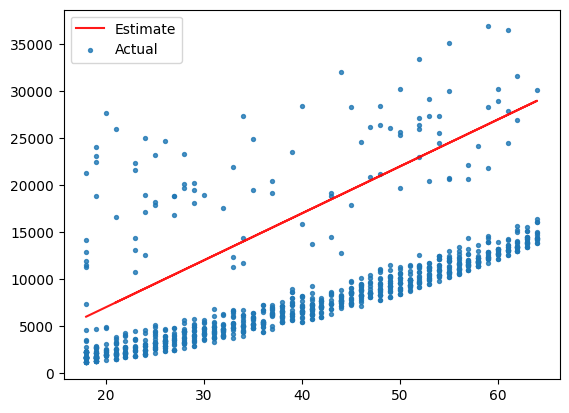

In [ ]:
try_parameters(500,-3000)

In [ ]:
targets=non_smoker_df.charges
targets

predictions=estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


Root mean squared error
using numpy library

targets- the data where we have to get
predictions- the data that we have predicted
m-slope
c=y-intercept

ERROR = 4806.071347347157


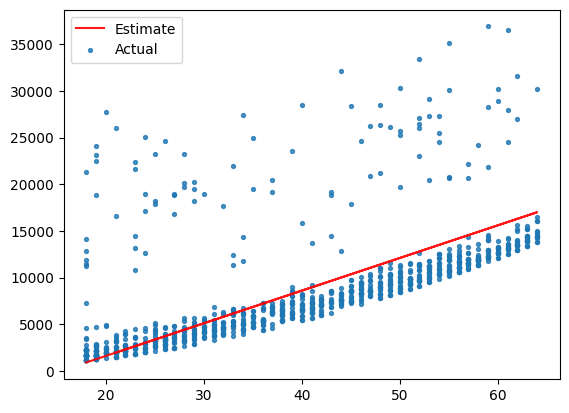

In [ ]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

m=350
c=-5400
# ERROR = 4806.071347347157

try_parameters(m,c)

targets=non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,m,c)

print('ERROR =',rmse(targets,predicted))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [ ]:
model=LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('inputs.shape :',inputs.shape)
print('targets.shape :',targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [ ]:
model.fit(inputs,targets)

model.predict(np.array([[23],
                        [37],
                        [61],
                        [44]]))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614,  9667.53160801])

In [ ]:
predictions=model.predict(inputs)
predictions

targets



,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rmse(targets,predictions)

4662.505766636395

In [ ]:
model.coef_


array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

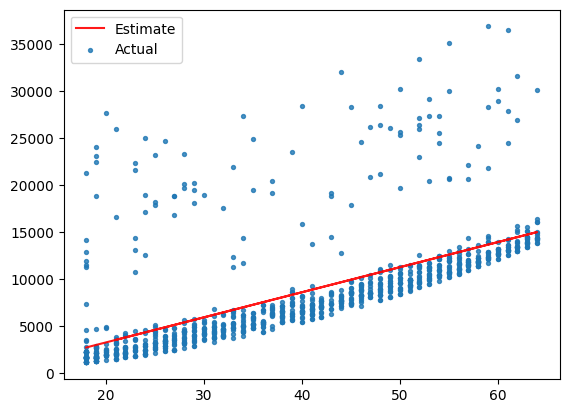

In [ ]:
try_parameters(model.coef_,model.intercept_)

In [ ]:
model1=SGDRegressor()



smoker_df --the datafrfame which shows data of the people who said yes to smoking
i have taken

In [ ]:
smoker_df=insurance_df[insurance_df.smoker=='yes']


def try_parameters1(m,c):
    ages=smoker_df.age
    target=smoker_df.charges

    estimated_charges=estimate_charges(ages,m,c)
    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(['Estimate','Actual']);

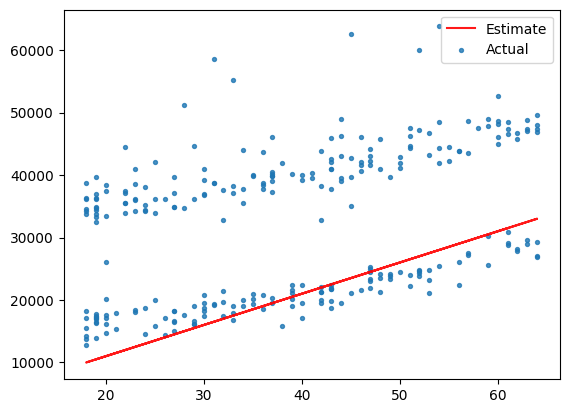

In [ ]:
try_parameters1(500,1000)

In [ ]:
inputs1=smoker_df[['age']]
targets1=smoker_df.charges
print('inputs1.shape :',inputs.shape)
print('targets1.shape :',targets.shape)

inputs1.shape : (1064, 1)
targets1.shape : (1064,)


In [ ]:
model1.fit(inputs1,targets1)

prediction1=model1.predict(inputs1)
targets1


,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [ ]:
rmse(targets1,prediction1)


48209871535.448296

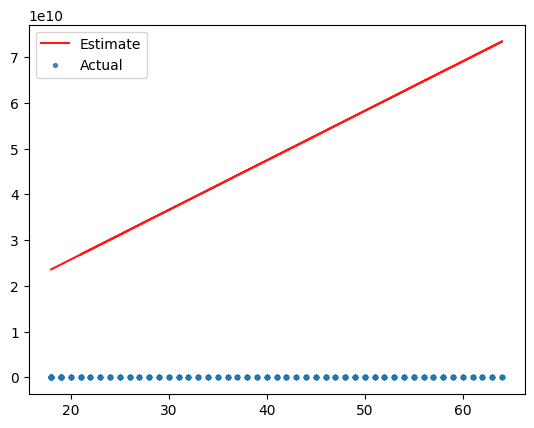

In [ ]:
try_parameters(model1.coef_,model1.intercept_)

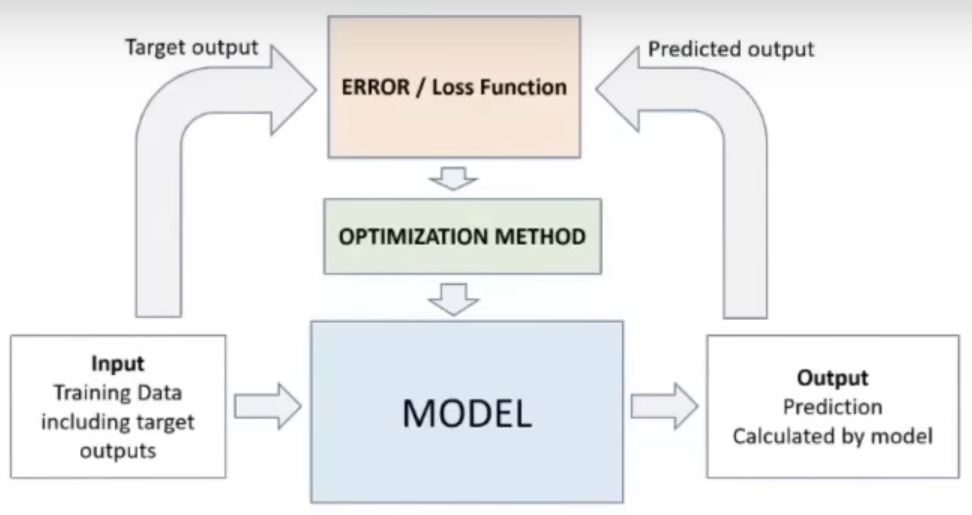

In [ ]:
# CREATE INPUTS AND TARGETS
input,target=non_smoker_df[['age','bmi']],non_smoker_df['charges']
# CREATE MODEL AND TRAIN IT
model=LinearRegression().fit(input,target)
# GENERATE PREDICTIONS
prediction=model.predict(input)
# COMPUTE LOSS TO EVALUATE THE MODEL
losss=rmse(target,prediction)
print('loss :',losss)



loss : 4662.3128354612945


model with three features

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)


0.13892870453542192

In [ ]:
fig=px.strip(non_smoker_df,
             x='children',
             y='charges',
             title='Children vs charges')
fig.update_traces(marker_size=4,marker_opacity=0.7)
fig.show()

In [ ]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df.charges

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print('loss :',loss)

loss : 4608.470405038247


as we can see if we use multiple features our lolss is decreasing gradually

categorical features


binary categories

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


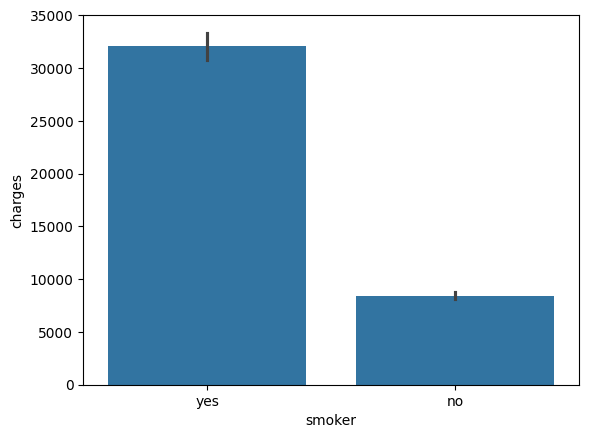

In [ ]:
sns.barplot(data=insurance_df,x='smoker',y='charges');
smoker_codes={'no':0,'yes':1}
sex_codes={'female':0,'male':1}

insurance_df['sex_code']=insurance_df.sex.map(sex_codes)
# maps into the dataframe where ever there is female in sex column there will be 0 and for male there will be 1
# same goes for smoker code too
insurance_df['smoker_code']=insurance_df.smoker.map(smoker_codes)
insurance_df

In [ ]:
insurance_df.charges.corr(insurance_df.smoker_code)


0.787251430498478

In [ ]:
inputs,targets=insurance_df[['age','bmi','children','smoker_code']],insurance_df.charges

model=LinearRegression().fit(inputs,targets)

prediction=model.predict(inputs)

loss=rmse(targets,prediction)
print('LOSS:',loss)

LOSS: 6056.439217188081


In [ ]:
inputs,targets=insurance_df[['age','bmi','children','sex_code','smoker_code']],insurance_df.charges

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print('LOSS:',loss)

LOSS: 6056.100708754546


one hot coding


takes a categorical column and creates small hot vectors
region column has 4 categorical data using one hot coding we will convert it into arrays


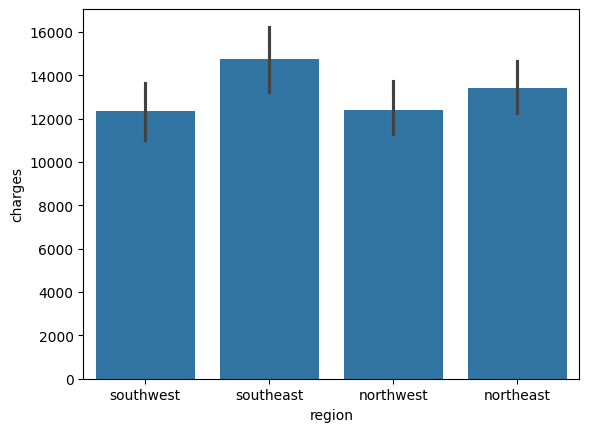

In [ ]:
sns.barplot(data=insurance_df,x='region',y='charges');


In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(insurance_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast'],
               ['northwest'],
               ['southeast'],
               ['southwest']]).toarray()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
one_hot=enc.transform(insurance_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
insurance_df[['northeast','northwest','southeast','southwest']]=one_hot
insurance_df

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


lets include regions into linear regression model

using 6 features

In [ ]:
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs,targets=insurance_df[input_cols],insurance_df.charges

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print('loss:',loss)

loss: 6041.6796511744515


In [ ]:
insurance_df[input_cols].loc[20]

,20
age,60.000
bmi,36.005
children,0.000
smoker_code,0.000
sex_code,0.000
northeast,1.000
northwest,0.000
southeast,0.000
southwest,0.000


In [ ]:
model.predict([[28,30,2,0,1,0,0,0,1.]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5288.87864281])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(insurance_df[numeric_cols])
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs=scaler.transform(insurance_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data=insurance_df[cat_cols]
categorical_data

,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,1,0,0.0,0.0,0.0,1.0
1,0,1,0.0,0.0,1.0,0.0
2,0,1,0.0,0.0,1.0,0.0
3,0,1,0.0,1.0,0.0,0.0
4,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,0,1,0.0,1.0,0.0,0.0
1334,0,0,1.0,0.0,0.0,0.0
1335,0,0,0.0,0.0,1.0,0.0
1336,0,0,0.0,0.0,0.0,1.0


In [ ]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=insurance_df.charges

model=LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)

loss=rmse(targets,predictions)
print('loss:',loss)

loss: 6041.6796511744515


In [ ]:
new_customer=[[28,30,2,0,1,0,0,0,1.]]
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928 , 0,1,0,0,0,1.]])

array([5288.87864053])

In [ ]:
model.predict([[85,30,2,0,1,0,0,0,1.]])

array([377774.06507145])